In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
%cd /kaggle/working
!git clone https://github.com/mHemaAP/S13.git
%cd EvS13_dev2

/kaggle/working
fatal: destination path 'EvS13_dev2' already exists and is not an empty directory.
/kaggle/working/EvS13_dev2


In [ ]:
!mkdir -p checkpoints2
!git checkout main
!git pull
!ln -s /kaggle/input/pascal-voc-dataset-used-in-yolov3-video/PASCAL_VOC PASCAL_VOC
!ls

Already on 'main'
Your branch is up to date with 'origin/main'.
Already up to date.
PASCAL_VOC   checkpoint.pth.tar  config.py	 loss.py	   train.py
README.md    checkpoints	 dataset.py	 model.py	   utils.py
__pycache__  checkpoints2	 lightning_logs  requirements.txt  yolo3.py


In [ ]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 8.4 MB/s eta 0:00:0000:010:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.4.8-py3-none-any.whl size=38245 sha256=fe0cb6f52f8a0ecc335c16ee085a4ae24f15d8735b1cfbd132c5c5569a26a304
  Stored in directory: /root/.cache/pip/wheels/f8/04/36/94ff3c8a4215826a21946b34c01180817e606989fdf53f7cd6
Successfully built grad-cam


In [ ]:
import torch
from model import Yolo3_PL_Model
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks import ModelSummary, LearningRateMonitor, ModelCheckpoint

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

Device Selected: cuda


In [ ]:
yolo3_model = Yolo3_PL_Model(learning_rate=0.00072, nepochs=40)
yolo3_trainer = Trainer(max_epochs=40, precision='16-mixed', devices=-1,
                  callbacks=[
                      ModelSummary(max_depth=10),
                      LearningRateMonitor(logging_interval='step'),
                      ModelCheckpoint(
                          dirpath='checkpoints/',
                          filename='{epoch}-{val_loss:.2f}',
                          save_last=True
                      )])

/opt/conda/lib/python3.10/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:615: UserWarning: Checkpoint directory /kaggle/working/EvS13_dev2/checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

=> Saving checkpoint
Epoch:  1
Train loss 24.21485710144043


Validation: 0it [00:00, ?it/s]

=> Saving checkpoint
Epoch:  2
Train loss 14.404644966125488


Validation: 0it [00:00, ?it/s]

=> Saving checkpoint
Epoch:  3
Train loss 13.257530212402344


Validation: 0it [00:00, ?it/s]

=> Saving checkpoint
Epoch:  4
Train loss 12.322805404663086


Validation: 0it [00:00, ?it/s]

=> Saving checkpoint
Epoch:  5
Train loss 11.408265113830566


Validation: 0it [00:00, ?it/s]

=> Saving checkpoint
Epoch:  6
Train loss 10.595772743225098


Validation: 0it [00:00, ?it/s]

=> Saving checkpoint
Epoch:  7
Train loss 10.01855182647705


Validation: 0it [00:00, ?it/s]

=> Saving checkpoint
Epoch:  8
Train loss 9.541840553283691


Validation: 0it [00:00, ?it/s]

=> Saving checkpoint
Epoch:  9
Train loss 9.057300567626953


Validation: 0it [00:00, ?it/s]

=> Saving checkpoint
Epoch:  10
Train loss 8.642097473144531


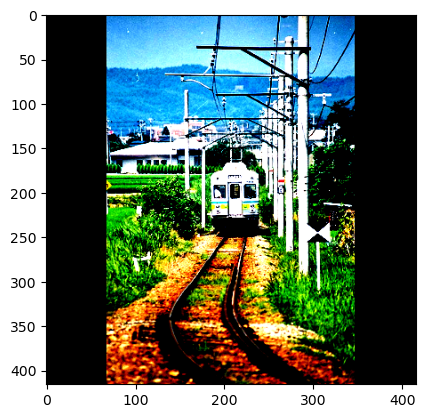

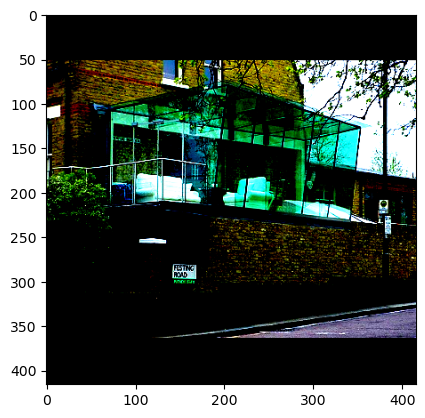

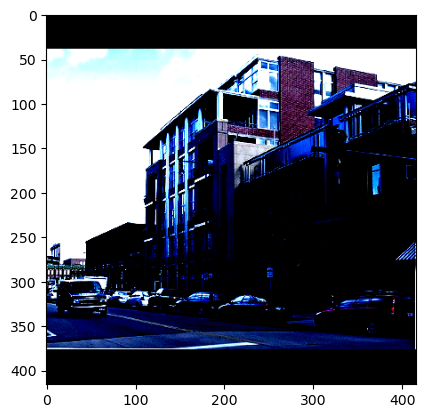

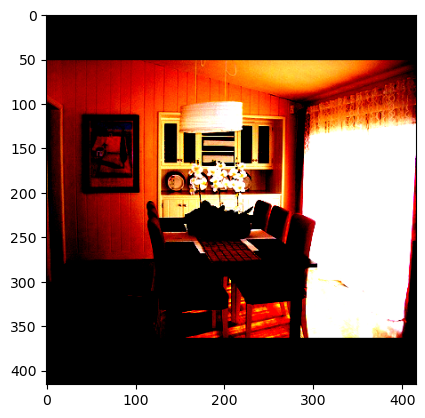

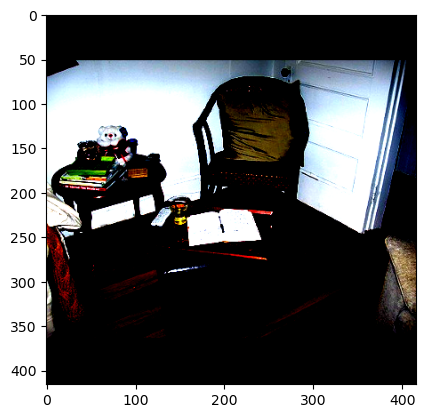

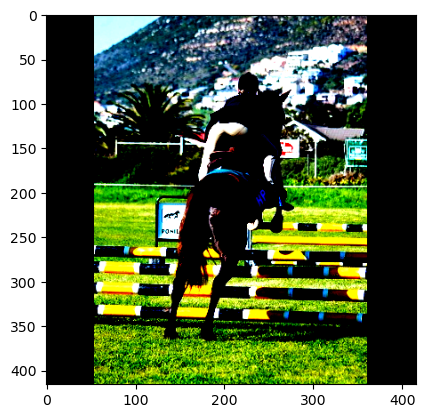

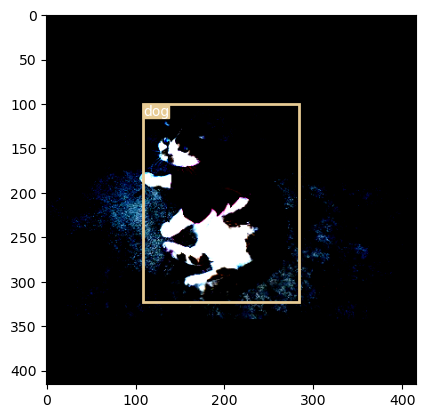

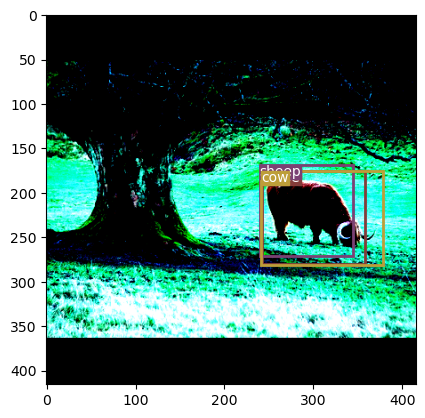

On Train loader:



100%|██████████| 518/518 [11:33<00:00,  1.34s/it]


Class accuracy is: 53.518021%
No obj accuracy is: 97.500610%
Obj accuracy is: 51.095032%


Validation: 0it [00:00, ?it/s]

=> Saving checkpoint
Epoch:  11
Train loss 8.319992065429688


Validation: 0it [00:00, ?it/s]

=> Saving checkpoint
Epoch:  12
Train loss 8.027117729187012


Validation: 0it [00:00, ?it/s]

=> Saving checkpoint
Epoch:  13
Train loss 7.805113315582275


Validation: 0it [00:00, ?it/s]

=> Saving checkpoint
Epoch:  14
Train loss 7.646729469299316


Validation: 0it [00:00, ?it/s]

=> Saving checkpoint
Epoch:  15
Train loss 7.425610065460205


Validation: 0it [00:00, ?it/s]

=> Saving checkpoint
Epoch:  16
Train loss 7.276646137237549


Validation: 0it [00:00, ?it/s]

=> Saving checkpoint
Epoch:  17
Train loss 7.035888671875


Validation: 0it [00:00, ?it/s]

=> Saving checkpoint
Epoch:  18
Train loss 6.8796820640563965


Validation: 0it [00:00, ?it/s]

=> Saving checkpoint
Epoch:  19
Train loss 6.673786163330078


Validation: 0it [00:00, ?it/s]

=> Saving checkpoint
Epoch:  20
Train loss 6.554152965545654


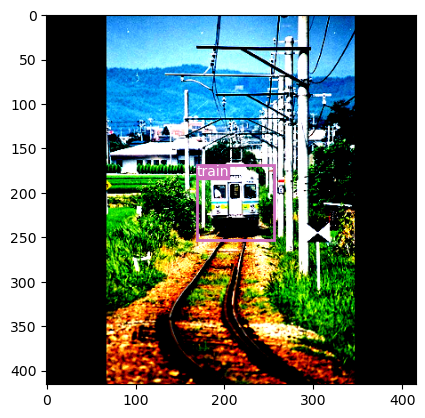

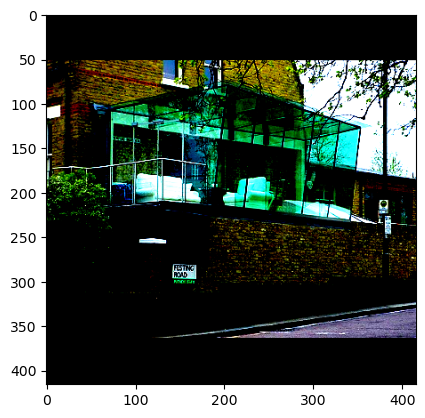

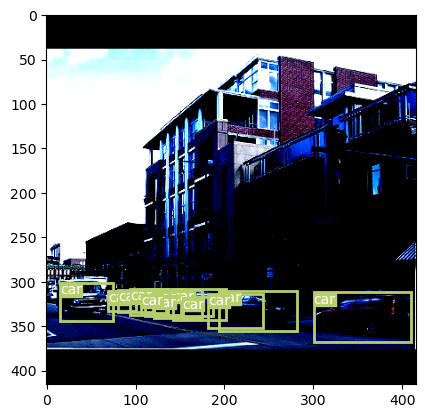

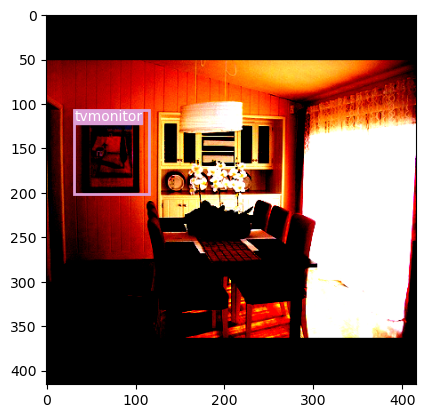

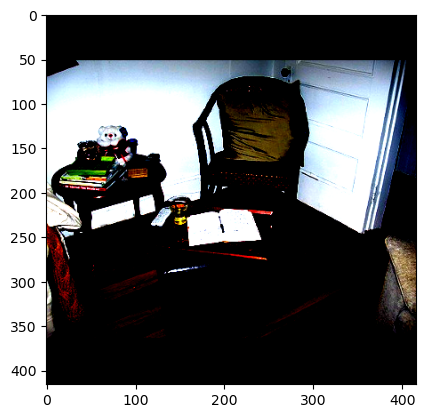

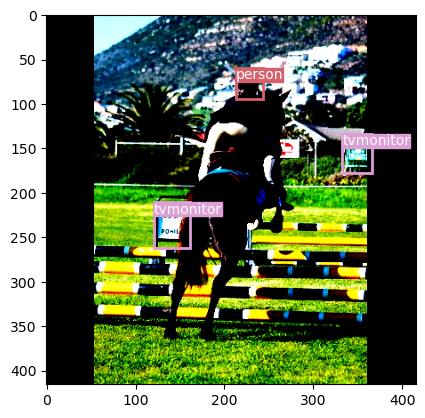

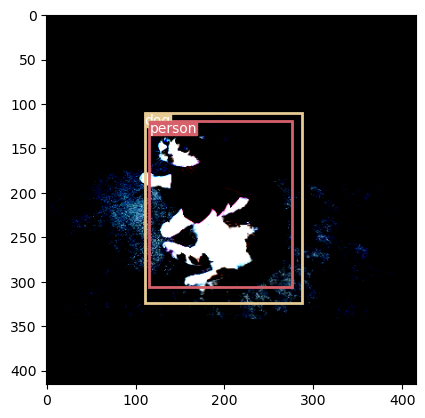

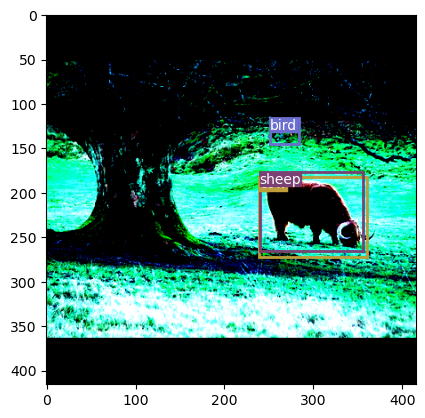

On Train loader:



100%|██████████| 518/518 [11:13<00:00,  1.30s/it]


Class accuracy is: 67.509796%
No obj accuracy is: 97.942795%
Obj accuracy is: 59.631802%


Validation: 0it [00:00, ?it/s]

=> Saving checkpoint
Epoch:  21
Train loss 6.3652215003967285


Validation: 0it [00:00, ?it/s]

=> Saving checkpoint
Epoch:  22
Train loss 6.252094745635986


Validation: 0it [00:00, ?it/s]

=> Saving checkpoint
Epoch:  23
Train loss 6.127564430236816


Validation: 0it [00:00, ?it/s]

=> Saving checkpoint
Epoch:  24
Train loss 5.951688766479492


Validation: 0it [00:00, ?it/s]

=> Saving checkpoint
Epoch:  25
Train loss 5.8052496910095215


Validation: 0it [00:00, ?it/s]

=> Saving checkpoint
Epoch:  26
Train loss 5.692990779876709


Validation: 0it [00:00, ?it/s]

=> Saving checkpoint
Epoch:  27
Train loss 5.525411128997803


Validation: 0it [00:00, ?it/s]

=> Saving checkpoint
Epoch:  28
Train loss 5.411254405975342


Validation: 0it [00:00, ?it/s]

=> Saving checkpoint
Epoch:  29
Train loss 5.270341873168945


Validation: 0it [00:00, ?it/s]

=> Saving checkpoint
Epoch:  30
Train loss 5.130073070526123


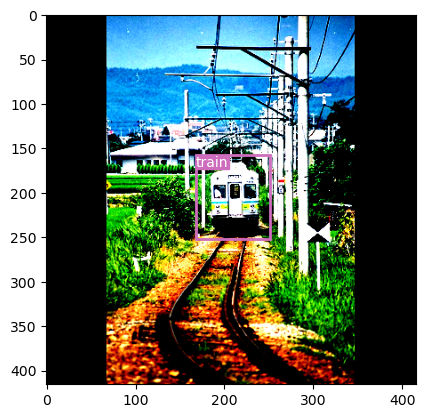

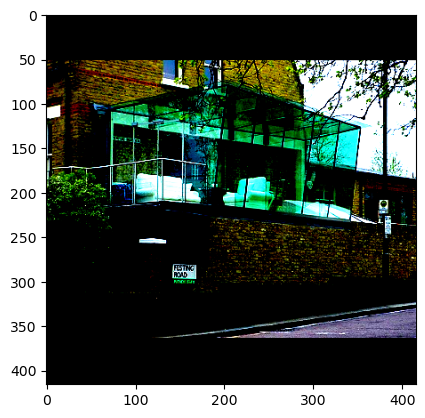

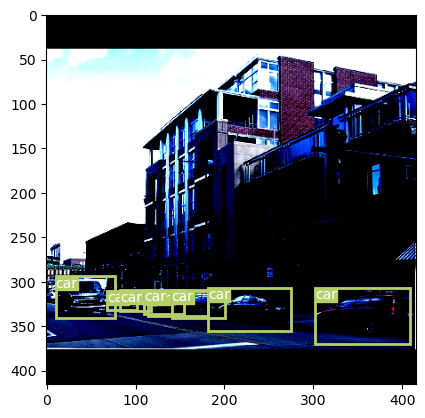

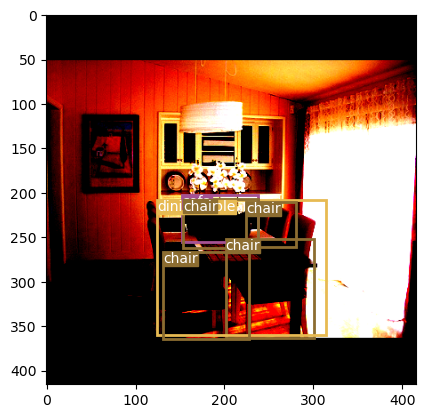

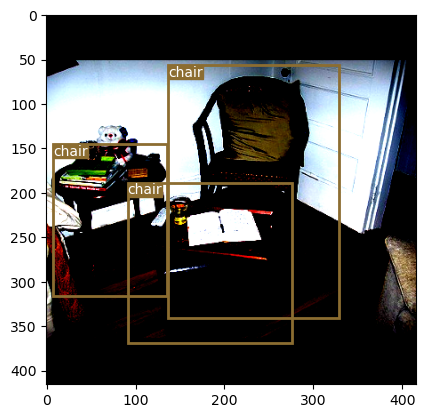

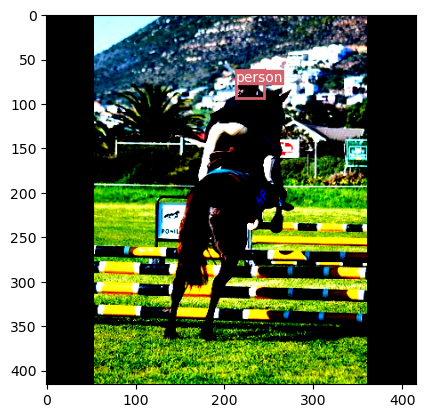

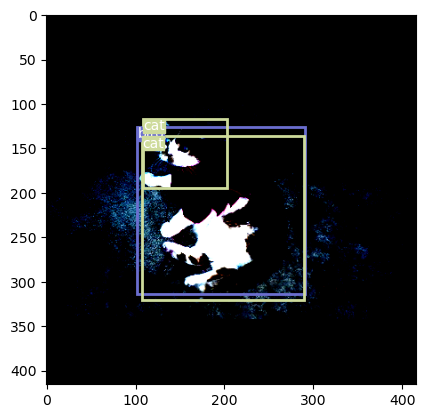

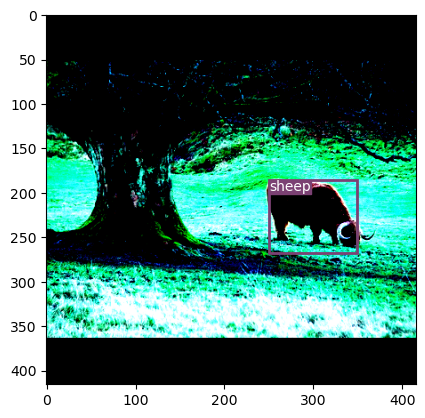

On Train loader:



100%|██████████| 518/518 [11:23<00:00,  1.32s/it]


Class accuracy is: 76.631737%
No obj accuracy is: 98.119591%
Obj accuracy is: 67.806892%


Validation: 0it [00:00, ?it/s]

=> Saving checkpoint
Epoch:  31
Train loss 4.962046146392822


Validation: 0it [00:00, ?it/s]

=> Saving checkpoint
Epoch:  32
Train loss 4.87649393081665
On Train Eval loader:



100%|██████████| 155/155 [01:04<00:00,  2.40it/s]


Class accuracy is: 84.580215%
No obj accuracy is: 98.080009%
Obj accuracy is: 70.673317%



100%|██████████| 155/155 [20:33<00:00,  7.96s/it]


MAP:0.3738051950931549


Validation: 0it [00:00, ?it/s]

=> Saving checkpoint
Epoch:  33
Train loss 4.711148738861084


Validation: 0it [00:00, ?it/s]

=> Saving checkpoint
Epoch:  34
Train loss 4.63518762588501


Validation: 0it [00:00, ?it/s]

=> Saving checkpoint
Epoch:  35
Train loss 4.510973930358887


Validation: 0it [00:00, ?it/s]

=> Saving checkpoint
Epoch:  36
Train loss 4.357739448547363


Validation: 0it [00:00, ?it/s]

=> Saving checkpoint
Epoch:  37
Train loss 4.269843101501465


Validation: 0it [00:00, ?it/s]

=> Saving checkpoint
Epoch:  38
Train loss 4.136178970336914


Exception ignored in: <function _xla_gc_callback at 0x7aad77cc8dc0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/jax/_src/lib/__init__.py", line 103, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:1133 in _try_get_data     │
│                                                                                                  │
│   1130 │   │   # Returns a 2-tuple:                                                              │
│   1131 │   │   #   (bool: whether successfully get data, any: data if successful else None)      │
│   1132 │   │   try:                                                                              │
│ ❱ 1133 │   │   │   data = self._data_queue.get(timeout=timeout)                                  │
│   1134 │   │   │   return (True, data)                                                           │
│   1135 │   │   except Exception as e:                                                            │
│   1136 │   │   │   # At timeout and error, we manually check whether any worker has              │
│                                                                                                  │
│ /opt/conda/lib/python3.10/queue.py:179 in get                                                    │
│                                                                                                  │
│   176 │   │   │   │   while not self._qsize():                                                   │
│   177 │   │   │   │   │   remaining = endtime - time()                                           │
│   178 │   │   │   │   │   if remaining <= 0.0:                                                   │
│ ❱ 179 │   │   │   │   │   │   raise Empty                                                        │
│   180 │   │   │   │   │   self.not_empty.wait(remaining)                                         │
│   181 │   │   │   item = self._get()                                                             │
│   182 │   │   │   self.not_full.notify()                                                         │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
Empty

The above exception was the direct cause of the following exception:

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3508 in run_code        │
│                                                                                                  │
│   3505 │   │   │   │   if async_:                                                                │
│   3506 │   │   │   │   │   await eval(code_obj, self.user_global_ns, self.user_ns)               │
│   3507 │   │   │   │   else:                                                                     │
│ ❱ 3508 │   │   │   │   │   exec(code_obj, self.user_global_ns, self.user_ns)                     │
│   3509 │   │   │   finally:                                                                      │
│   3510 │   │   │   │   # Reset our crash handler in place                                        │
│   3511 │   │   │   │   sys.excepthook = old_excepthook                                           │
│                                                                                                  │
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 yolo3_trainer.fit(yolo3_model)                                                               │
│   2                                                                                              │
│                                                                                                  │
│ /opt/conda/lib/python3.10/site-packages/pytorch_lightning/trainer/trainer.py:531 in fit          │
│                                                                                    

In [ ]:
yolo3_trainer.fit(yolo3_model)

In [ ]:
yolo3_trainer.validate(yolo3_model)

Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         val_loss          │    3.7035865783691406     │
└───────────────────────────┴───────────────────────────┘

[{'val_loss': 3.7035865783691406}]

In [ ]:
%cd /kaggle/working/EvS13_dev2

/kaggle/working/EvS13_dev2


In [ ]:
!mkdir -p checkpoints
!ln -s /kaggle/input/pascal-voc-dataset-used-in-yolov3-video/PASCAL_VOC PASCAL_VOC
!ls

EvS13_dev2.zip	checkpoint.pth.tar  dataset.py	    model.py	      utils.py
PASCAL_VOC	checkpoints	    directory.zip   requirements.txt  yolo3.py
README.md	checkpoints4	    lightning_logs  state.db
__pycache__	config.py	    loss.py	    train.py


In [ ]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 9.1 MB/s eta 0:00:0000:0100:02m
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.4.8-py3-none-any.whl size=38245 sha256=79a0e275751d7699dd91c7c776f47ead171f755b4085886a372773654f5142e0
  Stored in directory: /root/.cache/pip/wheels/f8/04/36/94ff3c8a4215826a21946b34c01180817e606989fdf53f7cd6
Successfully built grad-cam


In [ ]:
import torch
from model import Yolo3_PL_Model
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks import ModelSummary, LearningRateMonitor, ModelCheckpoint

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [ ]:
checkpoint_path = 'checkpoints/epoch=37-val_loss=3.71.ckpt'

In [ ]:
yolo3_model = Yolo3_PL_Model.load_from_checkpoint(checkpoint_path)

In [ ]:
yolo3_model = Yolo3_PL_Model(learning_rate=0.00072, nepochs=40)
yolo3_trainer = Trainer(max_epochs=40, precision='16-mixed', devices=-1,
                  callbacks=[
                      ModelSummary(max_depth=10),
                      LearningRateMonitor(logging_interval='step'),
                      ModelCheckpoint(
                          dirpath='checkpoints/',
                          filename='{epoch}-{val_loss:.2f}',
                          save_last=True
                      )])

/opt/conda/lib/python3.10/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:615: UserWarning: Checkpoint directory /kaggle/working/EvS13_dev2/checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

=> Saving checkpoint
Epoch:  39
Train loss 4.048932075500488


Validation: 0it [00:00, ?it/s]

=> Saving checkpoint
Epoch:  40
Train loss 3.974663496017456


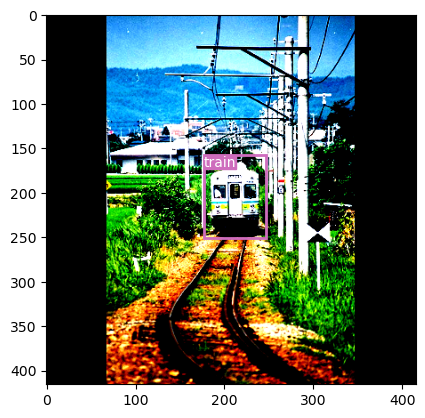

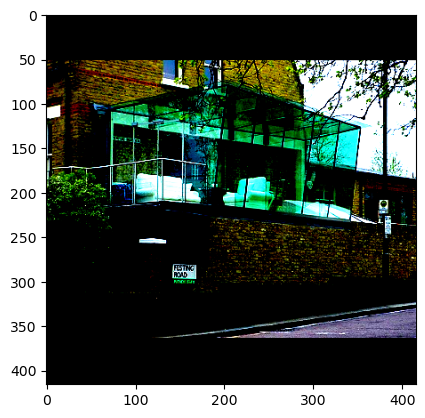

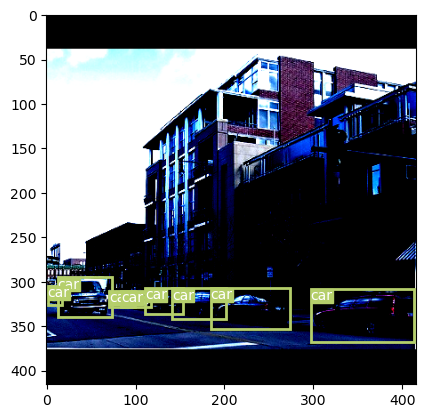

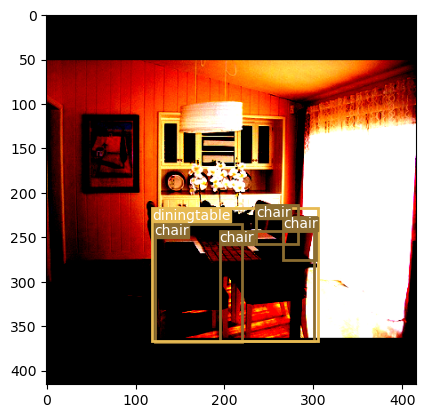

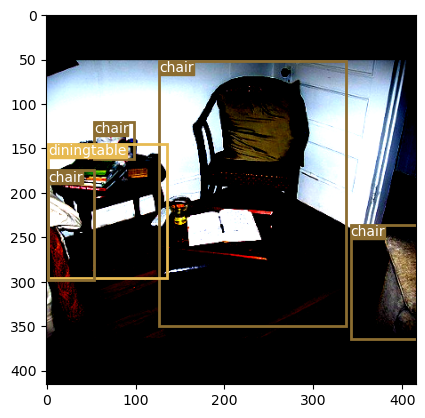

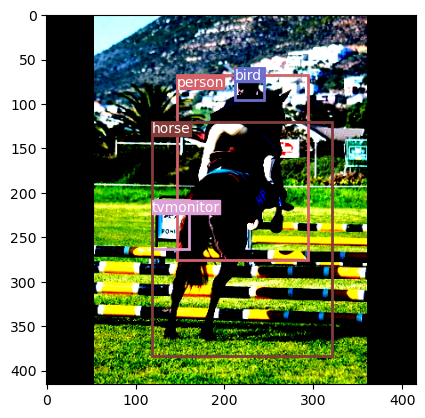

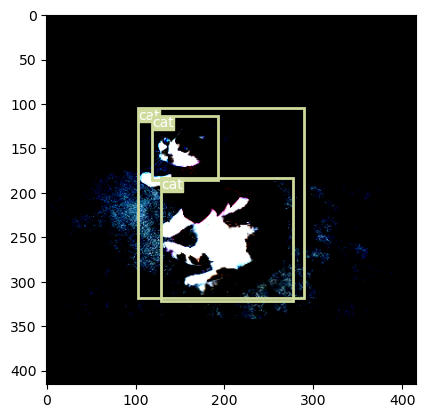

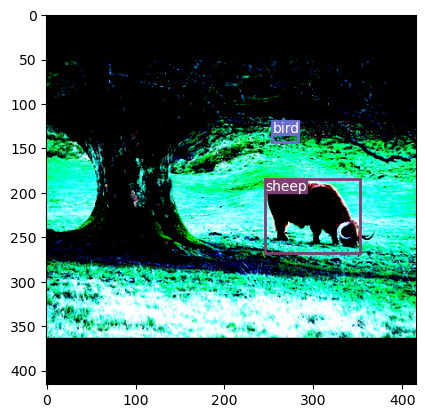

On Train loader:



100%|██████████| 518/518 [11:49<00:00,  1.37s/it]


Class accuracy is: 83.501251%
No obj accuracy is: 98.322731%
Obj accuracy is: 70.932663%
On Train Eval loader:



100%|██████████| 155/155 [01:11<00:00,  2.18it/s]


Class accuracy is: 88.279305%
No obj accuracy is: 98.428421%
Obj accuracy is: 71.909119%



100%|██████████| 155/155 [17:28<00:00,  6.76s/it]


MAP:0.4795970022678375


In [ ]:
# automatically restores model, epoch, step, LR schedulers, etc...
yolo3_trainer.fit(yolo3_model, ckpt_path=checkpoint_path)

In [ ]:
yolo3_trainer.validate(yolo3_model)

Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         val_loss          │     3.813297748565674     │
└───────────────────────────┴───────────────────────────┘

[{'val_loss': 3.813297748565674}]

In [ ]:
torch.save(yolo3_model.state_dict(), 'yolo3_model_dummy2.pth')